In [15]:
%matplotlib inline

In [127]:
import pandas as pd
import numpy as np


N = 1000000

p0 = 0.1
p = 0.01
tau = 5

alpha_x = {0: 10, 1: 5, 2: 2}
beta_x =  {0: 1, 1: 1, 2: 1}
lambda_x = {0: 20, 1: 10, 2: 5}

x = np.random.choice([0, 1, 2], size=N)

k = [alpha_x[x_i] for x_i in x]
theta = [1. / beta_x[x_i] for x_i in x]
lambd = [lambda_x[x_i] for x_i in x]
z2 = np.random.gamma(k, theta)
z1 = np.random.poisson(lambd)

y2 = np.random.binomial(1, p=p0 * np.exp(-z2/tau))
y1 = np.random.binomial(z1, p)
y = y1 + y2

df = pd.DataFrame({'X': x, 'Y': y, 'Z_1': z1, 'Z_2': z2, 
                   'Y1': y1, 'Y2': y2})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ad4373a90>,
      dtype=object)

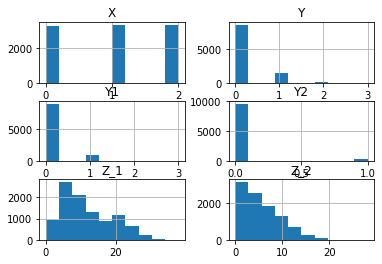

In [75]:
df.hist()

In [76]:
df.groupby('X').mean()['Y']

X
0    0.229627
1    0.138549
2    0.122388
Name: Y, dtype: float64

In [77]:
df.groupby('X').mean()[['Y1', 'Y2', 'Y']]

,Y1,Y2,Y
X,,,
0,0.213875,0.015753,0.229627
1,0.100926,0.037623,0.138549
2,0.046567,0.075821,0.122388


In [78]:
df.corr()

,X,Y,Z_1,Z_2,Y1,Y2
X,1.000000,-0.109143,-0.865280,-0.794974,-0.194512,0.120556
Y,-0.109143,1.000000,0.145894,0.072406,0.861295,0.482693
Z_1,-0.865280,0.145894,1.000000,0.705808,0.226358,-0.103150
Z_2,-0.794974,0.072406,0.705808,1.000000,0.157410,-0.128878
Y1,-0.194512,0.861295,0.226358,0.157410,1.000000,-0.029251
Y2,0.120556,0.482693,-0.103150,-0.128878,-0.029251,1.000000


In [79]:
from statsmodels.api import OLS

df['expz2'] = np.exp(-z2/tau)
df['intercept'] = 1.
model = OLS(endog=df['Y'], exog=df[['expz2', 'Z_2', 'Z_1', 'X', 'intercept']])

result1 = model.fit()
df['y_given_z2_x'] = result1.predict()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     60.59
Date:                Mon, 25 May 2020   Prob (F-statistic):           1.19e-50
Time:                        14:43:25   Log-Likelihood:                -4905.6
No. Observations:               10000   AIC:                             9821.
Df Residuals:                    9995   BIC:                             9857.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
expz2          0.0838      0.045      1.866      0.062      -0.004       0.172
Z_2           -0.0010      0.003     -0.367      0.713      -0.006       0.004
Z_1            0.0114      0.001     10.228      0.000       0.009       0.014
X              0.0070      0.012      0.571      0.568      -0.017       0.031
intercept     -0.0069      0.036     -0.194      0.846      -0.077       0.063
==============================================================================
Omnibus:                     4486.508   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18379.923
Skew:                           2.280   Prob(JB):                         0.00
Kurtosis:                       7.829   Cond. No.                         203.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
import keras
from keras.models import Model
from keras.layers import Dense, Input, Concatenate, Add
import tensorflow as tf


z1_in = Input(shape=(2,))
h11 = Dense(8, activation='tanh')(z1_in)
h12 = Dense(8, activation='tanh')(h11)
y1 = Dense(1, activation='linear')(h12)

#z2_in = Input(shape=(2,))
#h21 = Dense(8, activation='tanh')(z2_in)
#h22 = Dense(8, activation='tanh')(h21)
#y2 = Dense(1, activation='exponential')(h22)


#y_out = Add()([y1, y2])
#y_out = Dense(1, activation='linear')(h)


model = Model(inputs=[z1_in], outputs=[y1])
model.compile('RMSProp', loss='mse')

model.fit([df[['Z_1', 'X']], ], df['Y'], epochs=100, batch_size=4096)

Epoch 1/100
10000/10000 [==============================] - 0s 5us/step - loss: 1.1389
Epoch 2/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.7985
Epoch 3/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.6532
Epoch 4/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.5594
Epoch 5/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.4914
Epoch 6/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.4388
Epoch 7/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.3965
Epoch 8/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.3614
Epoch 9/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.3322
Epoch 10/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.3076
Epoch 11/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.2867
Epoch 12/100
10000/10000 [==========================

10000/10000 [==============================] - 0s 1us/step - loss: 0.1571
Epoch 96/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.1572
Epoch 97/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.1571
Epoch 98/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.1571
Epoch 99/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.1571
Epoch 100/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.1571


In [180]:
import keras
from keras.models import Model
from keras.layers import Dense, Input, Concatenate, Add
import tensorflow as tf


x_in = Input(shape=(1,))
h01 = Dense(8, activation='tanh')(x_in)
h02 = Dense(8, activation='tanh')(h01)
y0 = Dense(1, activation='exponential')(h02)

z2_in = Input(shape=(2,))
h21 = Dense(8, activation='tanh')(z2_in)
h22 = Dense(8, activation='tanh')(h21)
h23 = Dense(8, activation='tanh')(h22)
y2 = Dense(1, activation='linear')(h23)


y_out = Add()([y0, y2])


model = Model(inputs=[z2_in, x_in], outputs=y_out)
model.compile('RMSProp', loss='mse')

model.fit([df[['Z_2', 'X']], df[['X']]], df['Y'], epochs=100, batch_size=2*4096)

Epoch 1/100
1000000/1000000 [==============================] - 1s 1us/step - loss: 0.1932
Epoch 2/100
1000000/1000000 [==============================] - 1s 1us/step - loss: 0.1580
Epoch 3/100
1000000/1000000 [==============================] - 1s 1us/step - loss: 0.1575
Epoch 4/100
1000000/1000000 [==============================] - 1s 1us/step - loss: 0.1574
Epoch 5/100
1000000/1000000 [==============================] - 1s 1us/step - loss: 0.1574
Epoch 6/100
1000000/1000000 [==============================] - 1s 1us/step - loss: 0.1574
Epoch 7/100
1000000/1000000 [==============================] - 1s 1us/step - loss: 0.1573
Epoch 8/100
1000000/1000000 [==============================] - 1s 1us/step - loss: 0.1573
Epoch 9/100
1000000/1000000 [==============================] - 1s 1us/step - loss: 0.1573
Epoch 10/100
1000000/1000000 [==============================] - 1s 1us/step - loss: 0.1572
Epoch 11/100
1000000/1000000 [==============================] - 1s 1us/step - loss: 0.1572
Epoch 12

1000000/1000000 [==============================] - 1s 1us/step - loss: 0.1570
Epoch 92/100
1000000/1000000 [==============================] - 1s 1us/step - loss: 0.1570
Epoch 93/100
1000000/1000000 [==============================] - 1s 1us/step - loss: 0.1570
Epoch 94/100
1000000/1000000 [==============================] - 1s 1us/step - loss: 0.1570
Epoch 95/100
1000000/1000000 [==============================] - 1s 1us/step - loss: 0.1570
Epoch 96/100
1000000/1000000 [==============================] - 1s 1us/step - loss: 0.1570
Epoch 97/100
1000000/1000000 [==============================] - 1s 1us/step - loss: 0.1570
Epoch 98/100
1000000/1000000 [==============================] - 1s 1us/step - loss: 0.1570
Epoch 99/100
1000000/1000000 [==============================] - 1s 1us/step - loss: 0.1570
Epoch 100/100
1000000/1000000 [==============================] - 1s 1us/step - loss: 0.1570


In [222]:
#model = Model(inputs=[z1_in, ], outputs=[y1, y2])
#model.compile('RMSProp', loss='mse')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f180d337320>]],
      dtype=object)

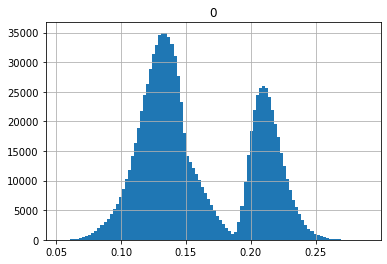

In [171]:
pd.DataFrame(model.predict([df[['Z_2', 'X']], df[['X']]])).hist(bins=100)

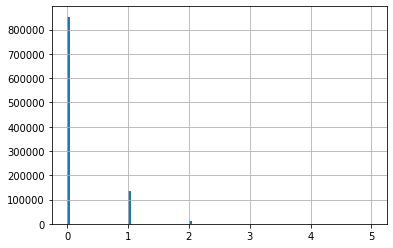

In [168]:
df.Y.hist(bins=100)

In [131]:
pd.DataFrame(model.predict(df[['Z_2', 'X']])).describe()

,0
count,1000000.000000
mean,0.151256
std,0.047117
min,0.068175
25%,0.113392
50%,0.134442
75%,0.208294
max,0.273516


In [20]:
from statsmodels.nonparametric.kernel_density import KDEMultivariateConditional

p_z1_given_x = KDEMultivariateConditional(endog=df[['Z_1']], exog=df[['X']], 
                                          dep_type='c', indep_type='u', 
                                          bw='normal_reference')

In [106]:
p_z2_given_x = KDEMultivariateConditional(endog=df[['Z_2']], exog=df[['X']], 
                                          dep_type='c', indep_type='u', 
                                          bw='normal_reference')


In [107]:
df['p_z2_given_x'] = p_z2_given_x.pdf()
#df['p_z1_given_x'] = p_z1_given_x.pdf()

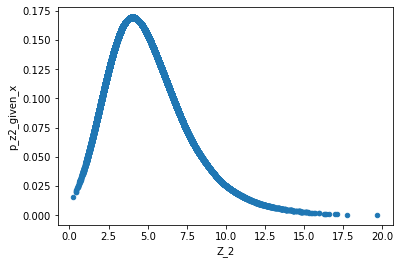

In [108]:
df[df.X==1].plot(x='Z_2', y='p_z2_given_x', kind='scatter')

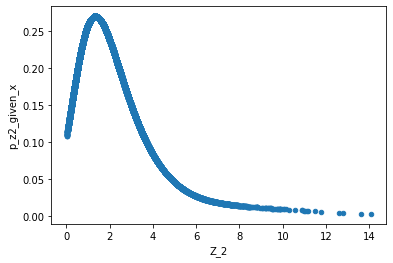

In [109]:
df[df.X==2].plot(x='Z_2', y='p_z2_given_x', kind='scatter')

In [135]:
px = df.groupby('X').count()

In [136]:
px / len(df)

,Y,Z_1,Z_2,Y1,Y2
X,,,,,
0,0.332772,0.332772,0.332772,0.332772,0.332772
1,0.334128,0.334128,0.334128,0.334128,0.334128
2,0.333100,0.333100,0.333100,0.333100,0.333100


In [28]:
from scipy.integrate import quad

def integrand(z1, x=0):
    f1 = float(p_z1_given_x.pdf(endog_predict=[z1], exog_predict=[x]))
    the_sum = 0.
    for xp in df.X.unique():
        y1 = model.predict([[[z1, xp]], ])[0][0]#[0]
        p_x = 1/3.
        the_sum += y1 * p_x
    return the_sum*f1
        
quad(lambda z: integrand(z, x=0.), df.Z_1.min(), df.Z_1.max())

(0.1726583270591865, 1.0014837987671325e-09)

In [29]:
quad(lambda z: integrand(z, x=1.), df.Z_1.min(), df.Z_1.max())

(0.14483949894912676, 1.4948802073663339e-09)

In [30]:
quad(lambda z: integrand(z, x=2.), df.Z_1.min(), df.Z_1.max())

(0.13108154590730867, 1.783828906758004e-09)

In [172]:
from scipy.integrate import quad

def integrand(z2, x=0):
    f1 = float(p_z2_given_x.pdf(endog_predict=[z2], exog_predict=[x]))
    the_sum = 0.
    for xp in df.X.unique():
        y2 = model.predict([[[z2, xp]], [xp,]])
        p_x = 1/3.
        the_sum += y2 * p_x
    return the_sum*f1
        
y_2_0 = quad(lambda z: integrand(z, x=0.), 
         df.Z_2.min() - 0.1 * df.Z_2.min() , 
         df.Z_2.max() + 0.1*df.Z_2.max())[0]
y_2_0

0.1365698334092837

In [173]:
y_2_1 =quad(lambda z: integrand(z, x=1.),  
         df.Z_2.min() - 0.1 * df.Z_2.min() , 
         df.Z_2.max() + 0.1*df.Z_2.max())[0]
y_2_1

0.15941882349137254

In [174]:
y_2_2 =quad(lambda z: integrand(z, x=2.),  
         df.Z_2.min() - 0.1 * df.Z_2.min() , 
         df.Z_2.max() + 0.1*df.Z_2.max())[0]
y_2_2

0.17570155727133313

In [175]:
df.groupby('X').mean()[['Y1', 'Y2', 'Y']]['Y2']

X
0    0.016092
1    0.040191
2    0.069487
Name: Y2, dtype: float64

In [176]:
df.groupby('X').mean()[['Y1', 'Y2', 'Y']]['Y2'][2] - df.groupby('X').mean()[['Y1', 'Y2', 'Y']]['Y2'][1]

0.029295456431626836

In [177]:
y_2_2 - y_2_1

0.01628273377996059

In [178]:
df.groupby('X').mean()[['Y1', 'Y2', 'Y']]['Y2'][2] - df.groupby('X').mean()[['Y1', 'Y2', 'Y']]['Y2'][0]

0.053394541553578145

In [179]:
y_2_2 - y_2_0

0.03913172386204944